# 04 - Training Results - Experiments with Mixed Precision Training

In [1]:
import os

os.chdir('..')

In [2]:
from src.utils import visualization as viz
from src.dev import results

DATA_DIR = 'data/snake_clef2021_dataset/training_history/mixed_precision/'


# load specification and progress data
specs_df = results.load_specs_files(DATA_DIR)
df = results.load_progress_files(specs_df, path=DATA_DIR)
specs_df

,model_file,history_file,no_epochs,model,loss,opt,input_size,batch_size,full_ds,aug,scheduler,learning_rate,mixed_precision,date
0,clef2021_resnest101_ce_05-10-2021_15-32.pth,clef2021_resnest101_ce_05-10-2021_15-32.csv,60,resnest101,ce,sgd,256,128,False,False,False,0.1,True,05-10-2021_15-32
1,clef2021_resnest101_ce_05-25-2021_06-09.pth,clef2021_resnest101_ce_05-25-2021_06-09.csv,30,resnest101,ce,sgd,256,128,False,False,False,0.1,False,05-25-2021_06-09
2,clef2021_resnest200_ce_05-25-2021_20-13.pth,clef2021_resnest200_ce_05-25-2021_20-13.csv,10,resnest200,ce,sgd,320,32,False,False,False,0.1,False,05-25-2021_20-13
3,clef2021_resnest200_ce_05-26-2021_06-53.pth,clef2021_resnest200_ce_05-26-2021_06-53.csv,10,resnest200,ce,sgd,320,32,False,False,False,0.1,True,05-26-2021_06-53
4,clef2021_resnest200_ce_05-26-2021_15-10.pth,clef2021_resnest200_ce_05-26-2021_15-10.csv,10,resnest200,ce,sgd,320,64,False,False,False,0.1,True,05-26-2021_15-10


## Fine-tuning ResNeSt-101 with Single Precision and Mixed Precision Numbers

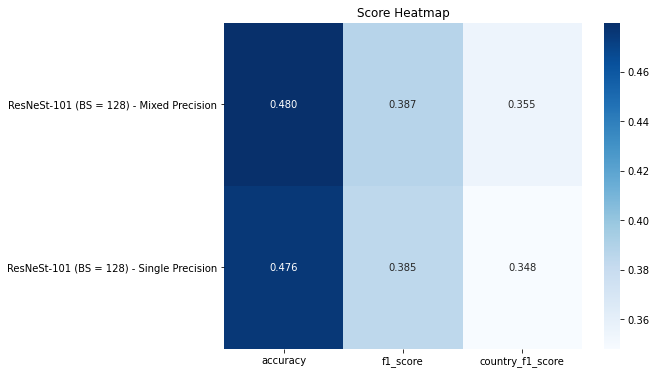

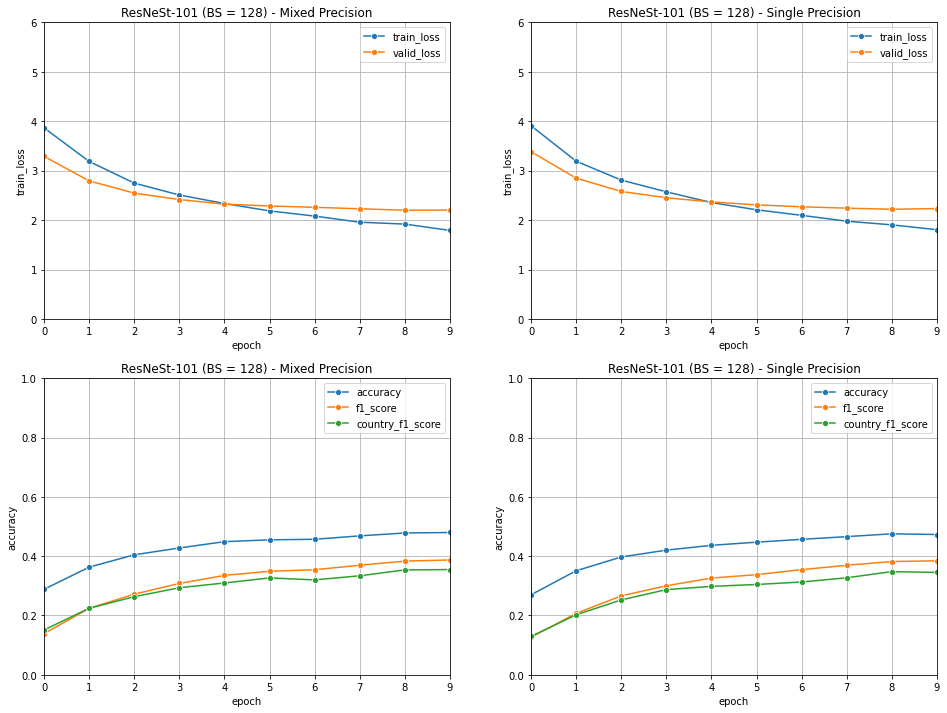

In [3]:
params = dict(model='resnest101', loss='ce', scheduler=False)

g1 = results.filter_items(df, outlen=23, opt='sgd', batch_size=128, mixed_precision=True, **params)
g1 = g1.iloc[:10]
g2 = results.filter_items(df, outlen=15, opt='sgd', batch_size=128, mixed_precision=False, **params)
g2 = g2.iloc[:10]

group_dict = {
    'ResNeSt-101 (BS = 128) - Mixed Precision': g1, 
    'ResNeSt-101 (BS = 128) - Single Precision': g2}

viz.plot_score_heatmap(group_dict, cmap='Blues')
viz.compare_training_process(group_dict, xlim=[0, 9])

## Fine-tuning ResNeSt-200 with Single Precision and Mixed Precision Numbers

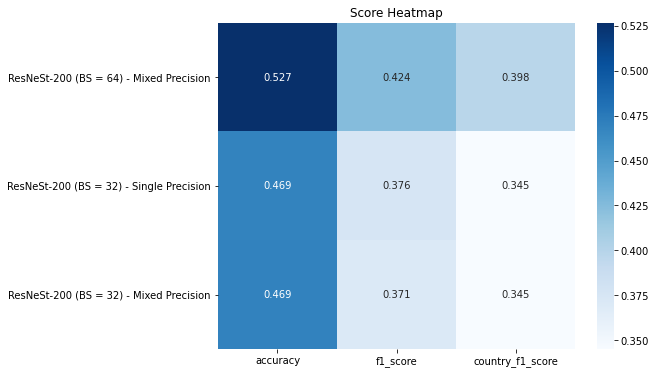

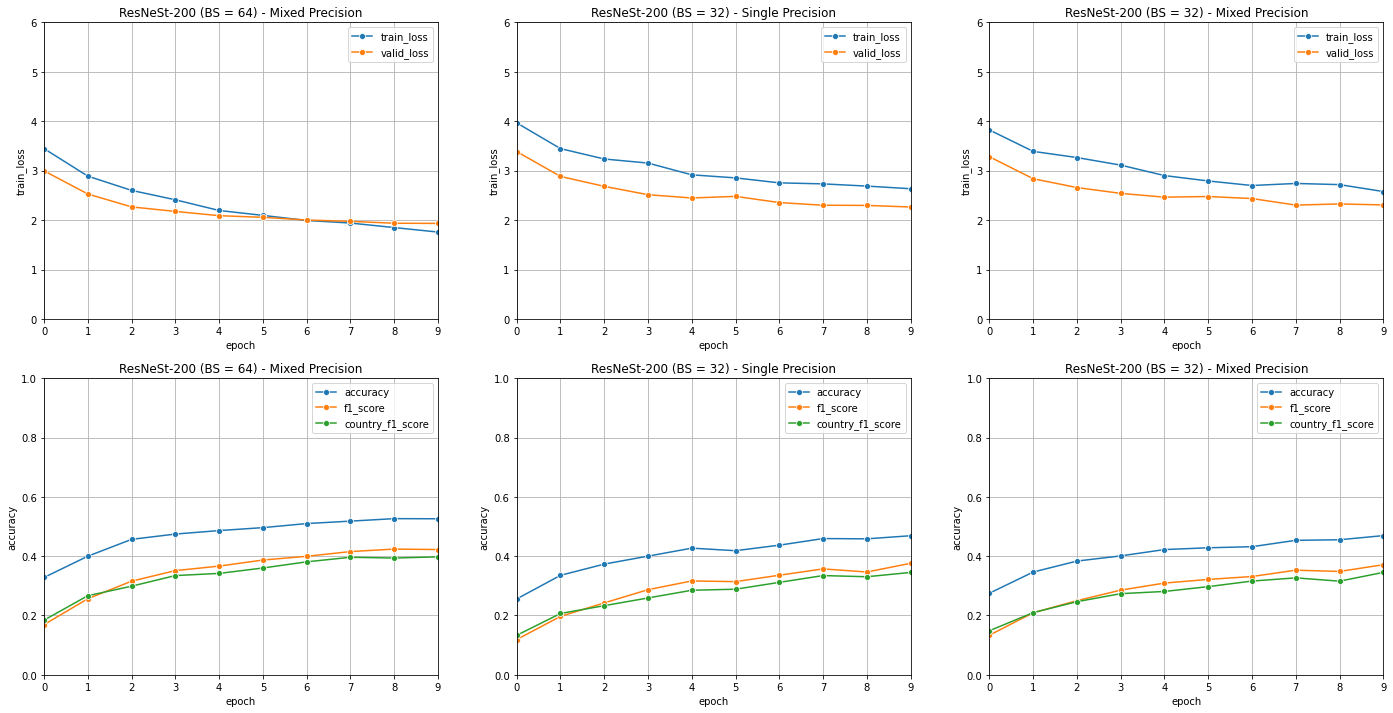

In [4]:
params = dict(model='resnest200', loss='ce', scheduler=False)

g1 = results.filter_items(df, outlen=10, opt='sgd', batch_size=64, mixed_precision=True, **params)
g2 = results.filter_items(df, outlen=10, opt='sgd', batch_size=32, mixed_precision=False, **params)
g3 = results.filter_items(df, outlen=10, opt='sgd', batch_size=32, mixed_precision=True, **params)


group_dict = {
    'ResNeSt-200 (BS = 64) - Mixed Precision': g1, 
    'ResNeSt-200 (BS = 32) - Single Precision': g2,
    'ResNeSt-200 (BS = 32) - Mixed Precision': g3}

viz.plot_score_heatmap(group_dict, cmap='Blues')
viz.compare_training_process(group_dict, xlim=[0, 9])